In [48]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [ ]:
import numpy as np
import pandas as pd
import scipy

In [2]:
# read data
file_location = "E:/BitTiger BA501/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name)

my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


In [3]:
### visualization

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
# notebook里特有的命令，notebook magic，告诉notebook需要对notebook做格式的改变，
# 把图在cell里打印出来（默认terminal里出图是打开一个新的窗口再保存）

In [5]:
### create figure and axes

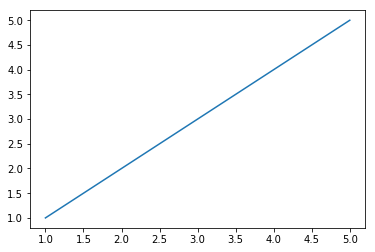

In [6]:
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
fig, ax = plt.subplots()
# create a simple line plot
ax.plot(x, y)

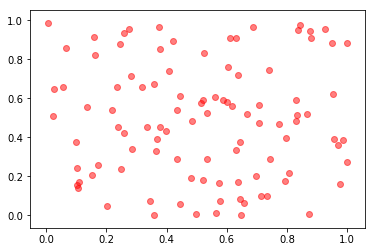

In [12]:
# scatterplot
N = 100
x = np.random.rand(N)
y = np.random.rand(N)

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, c="red")
# alpha是透明度，全是实心的话很难看清楚

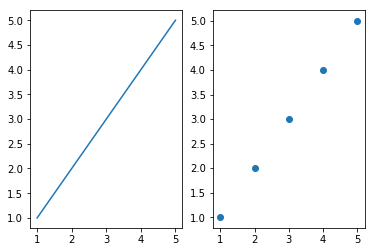

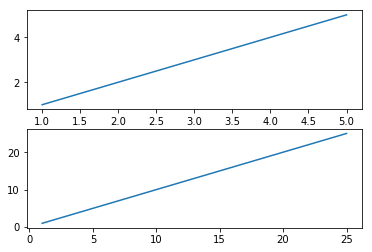

In [16]:
# create two plots
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])

# horizontally
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, y)
axes[1].scatter(x, y)
#axes[1].plot(x*x, y*y)

# vertically
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot(x, y)
axes[1].plot(x*x, y*y)

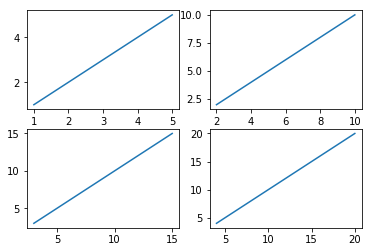

In [17]:
# 2x2 plot
fig, axes = plt.subplots(nrows=2, ncols=2) # axes is a 2d numpy array
axes[0,0].plot(x,y)
axes[0,1].plot(x*2,y*2)
axes[1,0].plot(x*3,y*3)
axes[1,1].plot(x*4,y*4)

In [18]:
### histogram

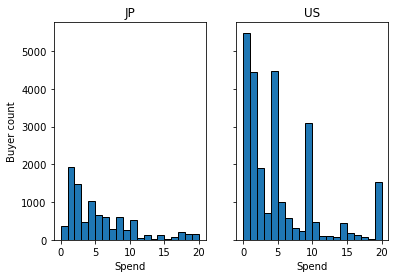

In [36]:
# distribution
#my_series = my_data[["spend_usd","country"]][(my_data.spend_usd < 20) & (my_data.country.isin(["US","JP","FR","UK"]))]
my_series_jp = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
my_series_us = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]
# used where statement
# 一层中括号出来的是series，没有表格线的格式；两层中括号出来的是data frame

# play with it first
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True) # 两个图用一样的横坐标和纵坐标
ax[0].hist(my_series_jp, bins=20, edgecolor="black")
ax[1].hist(my_series_us, bins=20, edgecolor="black")

ax[0].set_title("JP")
ax[1].set_title("US")
ax[0].set_ylabel("Buyer count") # sharex = sharey
ax[0].set_xlabel("Spend")
ax[1].set_xlabel("Spend")

In [23]:
### time series

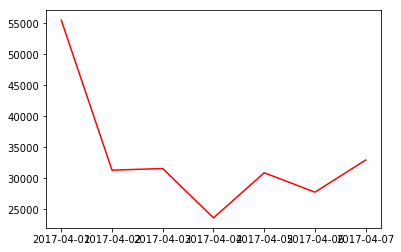

In [46]:
import datetime
# goal: compare revenue performance between red and blue
np.unique(my_data["experiment_id"])
red_button = np.unique(my_data["experiment_id"])[0]
blue_button = np.unique(my_data["experiment_id"])[1]
#red_button=12624548
#blue_button=12624549

# subset the data
red_button_data = my_data[['date','spend_usd']][my_data.experiment_id == red_button]

# change date format so that it can be plotted
my_data.date = pd.to_datetime(my_data.date, format='%Y-%m-%d')

# since we want to show total spend per day, we group by date. 
# now we have a series, with index = time, how nice
my_ts = red_button_data.groupby('date')['spend_usd'].sum()
my_ts # this is a series, works better this way
# my_ts = red_button_data.groupby('date')['spend_usd'].sum().reset_index()
# change it to array

fig, ax = plt.subplots()
ax.plot(my_ts, c= "red")
# change color: rgb

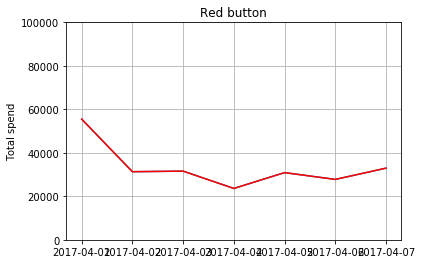

In [47]:
fig, ax = plt.subplots()
ax.plot(my_ts)
ax.plot(my_ts, c= "red")

# some tweaks
ax.set_ylim(0,100000)
ax.set_title("Red button")
ax.set_ylabel("Total spend")
ax.set_xlabel("")
#ax.grid(True, which="major")
ax.grid(True, which="both")

# format dollar sign - a little tricky

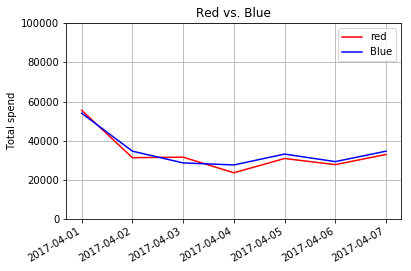

In [39]:
# now plot both red and blue
red_button = np.unique(my_data["experiment_id"])[0]
blue_button = np.unique(my_data["experiment_id"])[1]

# subset the data
red_button_data = my_data[['date','spend_usd']][my_data.experiment_id == red_button]
blue_button_data = my_data[['date','spend_usd']][my_data.experiment_id == blue_button]

red_ts = red_button_data.groupby('date')['spend_usd'].sum()
blue_ts = blue_button_data.groupby('date')['spend_usd'].sum()

fig, ax = plt.subplots()
ax.plot(red_ts, color="red", label="red")
ax.plot(blue_ts, color="blue", label = "blue")

# some tweaks
ax.set_ylim(0,100000)
ax.set_title("Red vs. Blue")
ax.set_ylabel("Total spend")
ax.grid(True, which="both")
# change legend
ax.legend().get_texts()[0].set_text("Red")
ax.legend().get_texts()[1].set_text("Blue")
# format date
plt.gcf().autofmt_xdate() # 旋转日期，使不重叠